### Cosine similarity 
##### Eg :- To check the content equality of docs in NLP

In [16]:
import tensorflow as tf 
import pandas as pd 
from collections import Counter

paragraphs = [
    "Machine learning is a subset of AI. AI and machine learning enable systems to learn and improve from experience without explicit programming. "
    "The core idea of AI and machine learning is to develop models that can make predictions based on data. AI-driven and Deep learning algorithms like decision trees, neural networks, and support vector machines "
    "play a crucial role in AI learning patterns and making intelligent AI-based decisions.",

    "Cybersecurity is crucial in cybersecurity strategies for protecting sensitive data and preventing cyber attacks. "
    "Encryption, firewalls, and intrusion detection systems help cybersecurity professionals safeguard networks from malicious cybersecurity activities. "
    "Ethical hacking and penetration testing play a significant role in cybersecurity by identifying cybersecurity vulnerabilities before cyber attackers exploit them. "
    "As cyber threats evolve, organizations must implement strong cybersecurity security protocols to defend against cybersecurity data breaches.",

    "Deep learning is a subset of machine learning and AI. Deep learning models, based on neural networks, power AI applications. "
    "These deep learning networks, often referred to as deep neural networks, are used in AI applications like image recognition, natural language processing, and speech recognition. "
    "AI-powered training of deep learning models requires large datasets and powerful computational resources for AI-driven innovations."
]

keywords = ["machine learning", "ai", "cybersecurity", "deep learning"]
df = pd.DataFrame(columns=keywords) 


for i, para in enumerate(paragraphs):
    word_counts = Counter()
    for word in keywords:
        word_counts[word] += para.lower().count(word.lower()) 
    idx = "para" + str(i) 
    df.loc[idx] = [word_counts[word] for word in keywords] 

df

,machine learning,ai,cybersecurity,deep learning
para0,3,6,0,1
para1,0,1,8,0
para2,1,6,0,4


In [ ]:
# Now, we have the features like machine learning, ai, cyber security grabed from above sample para's 
# Lets verify which para is talking about ai mainly using cosine simility 

### Cosine Similarity  
CosineSimilarity calculates how similar two vectors are based on the angle between them., I am assuming that [[7,6, 0, 8]] these are basic vals in case a para is about ai..... 

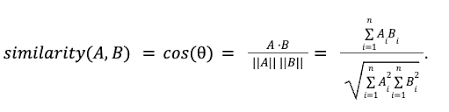


 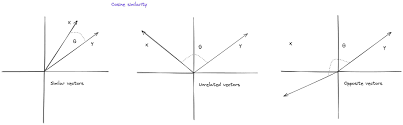

#### Note :- 
The output is negative because tf.keras.losses.CosineSimilarity is designed as a loss function (lower value means more similar). To get actual similarity, just negate the result:

Cosine Similarity =  −Cosine Loss

In [33]:
df.loc["para0"].values.reshape(1, -1).shape

(1, 4)

In [24]:
import numpy as np
np.array([[7,6, 0, 8]]).shape

(1, 4)

In [37]:
# checking similarity of ai related content with in para1 

actual_content = tf.constant([[7, 6, 0, 8]], dtype=tf.float32)  # my sample vector, assumed one

para1 = df.loc["para0"].values.reshape(1, -1)   
para1 = tf.constant(para1, dtype=tf.float32)   # Convert to TensorFlow tensor

cosine_loss = tf.keras.losses.CosineSimilarity(axis=1) 
cosine_similarity = -cosine_loss(actual_content, para1) 
cosine_similarity.numpy()

np.float32(0.78512955)

In [38]:
# checking similarity of ai related content with in para2

actual_content = tf.constant([[7, 6, 0, 8]], dtype=tf.float32)  # my sample vector, assumed one

para1 = df.loc["para1"].values.reshape(1, -1)   
para1 = tf.constant(para1, dtype=tf.float32)   # Convert to TensorFlow tensor

cosine_loss = tf.keras.losses.CosineSimilarity(axis=1) 
cosine_similarity = -cosine_loss(actual_content, para1) 
cosine_similarity.numpy()

np.float32(0.06096793)

In [39]:
# checking similarity of ai related content with in para3

actual_content = tf.constant([[7, 6, 0, 8]], dtype=tf.float32)  # my sample vector, assumed one

para1 = df.loc["para2"].values.reshape(1, -1)   
para1 = tf.constant(para1, dtype=tf.float32)   # Convert to TensorFlow tensor

cosine_loss = tf.keras.losses.CosineSimilarity(axis=1) 
cosine_similarity = -cosine_loss(actual_content, para1) 
cosine_similarity.numpy()

np.float32(0.8439762)

### Observation :- 
The result is stating that `how much percentage` of content is matching with my sample one or target feature.

1. 0.78512955 ~ 78.5%     Similarity content in para1, yes it is talking about ai
2. 0.06096793 ~ 06.09%    It is out of ai related
3. 0.8439762 ~ 84.3%      Content is about ai

### Batch inputs 
We can provide all in single pass

In [44]:
df.values.shape

(3, 4)

In [48]:
# take 3 instances for 3 different para's 
vector_a = tf.constant([[7, 6, 0, 8], [7, 6, 0, 8], [7, 6, 0, 8]], dtype=np.float32)
vector_b = tf.constant(df.values.reshape(3, -1), dtype=np.float32) 

cosine_loss2 = tf.keras.losses.CosineSimilarity(axis=1, reduction=None) 
cosine_similarity2  = -cosine_loss2(vector_a, vector_b) 
cosine_similarity2.numpy()

array([0.78512955, 0.06096793, 0.8439762 ], dtype=float32)

In [ ]:
These are the vals that we got before, this is like batch processing